In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# REVIEW

In [2]:
review = pd.read_csv('predicted_review.csv')
fake = review[review['True(1)/Deceptive(0)']=='Deceptive']
true = review[review['True(1)/Deceptive(0)']=='True']

In [3]:
review.groupby('True(1)/Deceptive(0)').count()['Review']

True(1)/Deceptive(0)
Deceptive     423516
True         1554986
Name: Review, dtype: int64

In [4]:
fake.groupby('True(1)/Deceptive(0)').count()['Review']

True(1)/Deceptive(0)
Deceptive    423516
Name: Review, dtype: int64

In [5]:
fake.groupby(['True(1)/Deceptive(0)','Stars']).count()['Review']

True(1)/Deceptive(0)  Stars
Deceptive             1.0       34294
                      2.0       22742
                      3.0       32638
                      4.0       94390
                      5.0      239452
Name: Review, dtype: int64

In [6]:
true['text length'] = true['Review'].apply(len)

/var/folders/31/jnhds9w56tbcvfhscjr2jzdc0000gn/T/ipykernel_1611/3699491623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['text length'] = true['Review'].apply(len)


In [7]:
fake['text length'] = fake['Review'].apply(len)

/var/folders/31/jnhds9w56tbcvfhscjr2jzdc0000gn/T/ipykernel_1611/2298697457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['text length'] = fake['Review'].apply(len)


# Compare restaurant ratings difference after filtering out fake reviews

In [8]:
a = review.groupby('business_id').sum()['Stars']
b = true.groupby('business_id').sum()['Stars']

review_count = review.groupby('business_id').count()['Review']
review_count2 = true.groupby('business_id').count()['Review']

rating_df = pd.DataFrame(a/review_count,columns = ['original rating'])
# rating_df['new rating'] = list(b/review_count2)
rating_df2= pd.DataFrame(b/review_count,columns = ['new rating'])

In [9]:
result = rating_df.join(rating_df2)

In [10]:
print(result.head(10))
sum((result['original rating'] > result['new rating']))

                        original rating  new rating
business_id                                        
--9e1ONYQuAa-CB_Rrw7Tw         4.087113    2.850972
--FBCX-N37CMYDfs790Bnw         3.830000    2.590000
--GM_ORV2cYS-h38DSaCLw         4.142857    3.428571
--I7YYLada0tSLkORTHb5Q         3.442623    2.622951
--KCl2FvVQpvjzmZSPyviA         2.916667    1.416667
--Ni3oJ4VOqfOEu7Sj2Vzg         2.000000    0.833333
--S62v0QgkqQaVUhFnNHrw         2.000000    1.772727
--U98MNlDym2cLn36BBPgQ         2.750000    2.500000
--cZ6Hhc9F7VkKXxHMVZSQ         3.913333    3.303333
--ujyvoQlwVoBgMYtADiLA         3.696970    2.984848


19454

# Histograms of text length distributions for each star rating True vs Fake review

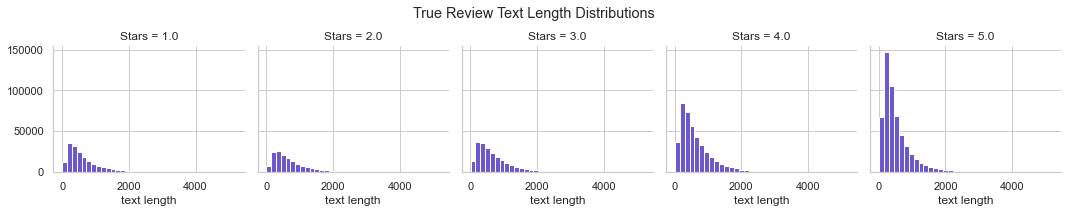

In [27]:
sns.set(style="whitegrid", color_codes=True)
sns.set_context(font_scale=8)
g = sns.FacetGrid(true, col='Stars')
g.map(plt.hist, 'text length', bins=35,color = 'slateblue')

plt.subplots_adjust(top=0.8)
plt.suptitle('True Review Text Length Distributions')
plt.show()

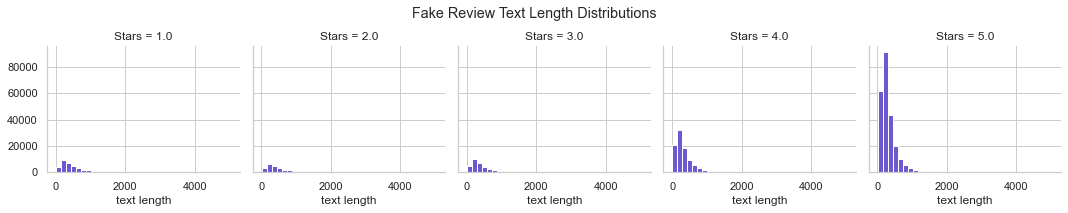

In [28]:
sns.set(style="whitegrid", color_codes=True)
g = sns.FacetGrid(fake, col='Stars',)
g.map(plt.hist, 'text length', bins=35,color = 'slateblue')

plt.subplots_adjust(top=0.8)
plt.suptitle('Fake Review Text Length Distributions')
plt.show()

# fake/true reivew stars distribution comparison

In [17]:
count = fake.groupby('Stars').count()
count2 = true.groupby('Stars').count()

/var/folders/31/jnhds9w56tbcvfhscjr2jzdc0000gn/T/ipykernel_1611/4040788822.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(pie[0], labels = names,fontsize = 12)


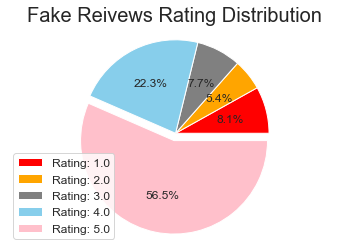

In [18]:
from matplotlib.gridspec import GridSpec

names='Rating: 1.0', 'Rating: 2.0', 'Rating: 3.0', 'Rating: 4.0','Rating: 5.0'
size=[count.iloc[0]['Review'],count.iloc[1]['Review'],count.iloc[2]['Review'],count.iloc[3]['Review'],count.iloc[4]['Review']]
size2=[count2.iloc[0]['Review'],count2.iloc[1]['Review'],count2.iloc[2]['Review'],count2.iloc[3]['Review'],count2.iloc[4]['Review']]

pie = plt.pie(size,autopct='%1.1f%%',explode=(0, 0, 0, 0, 0.08), colors=['red','orange','grey','skyblue','pink'])
plt.title('Fake Reivews Rating Distribution',fontsize = 20)
plt.axis('equal')
plt.legend(pie[0], labels = names,fontsize = 12)

plt.show()

/var/folders/31/jnhds9w56tbcvfhscjr2jzdc0000gn/T/ipykernel_1611/4286450963.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(pie[0], labels = names, fontsize = 12)


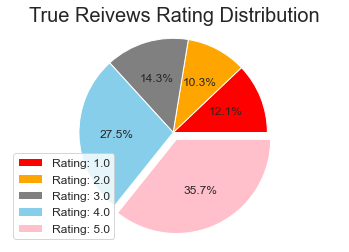

In [19]:
pie = plt.pie(size2, autopct='%1.1f%%',explode=(0, 0, 0, 0, 0.08), colors=['red','orange','grey','skyblue','pink'])
plt.title('True Reivews Rating Distribution',fontsize = 20)
plt.axis('equal')
plt.legend(pie[0], labels = names, fontsize = 12)

plt.show()

# BUSINESS

In [20]:
business = pd.read_csv('business_data.csv')


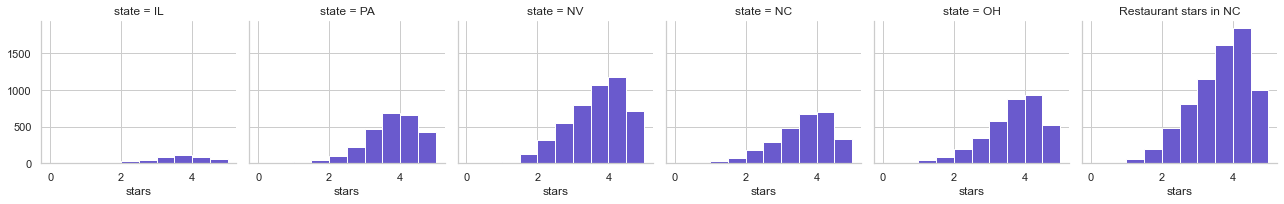

In [29]:
sns.set(style="whitegrid", color_codes=True)
g = sns.FacetGrid(business, col='state')
bins = np.linspace(0, 5, 11)
g.map(plt.hist,'stars',bins = bins,color = 'slateblue')

plt.title('Restaurant stars in NC')
plt.show()

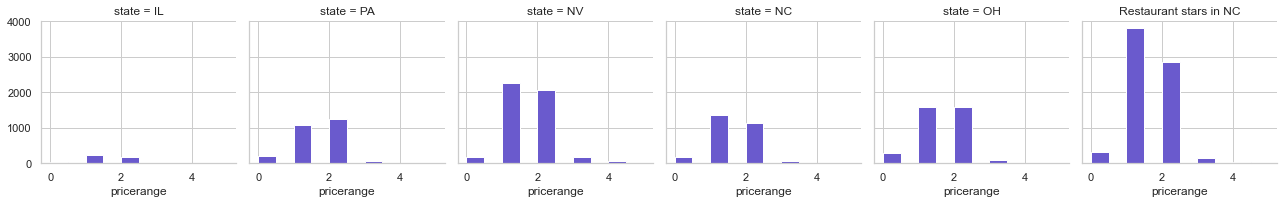

In [22]:
sns.set(style="whitegrid", color_codes=True)
g = sns.FacetGrid(business, col='state')
bins = np.linspace(0, 5, 11)
g.map(plt.hist,'pricerange',bins = bins,color = 'slateblue')

plt.title('Restaurant stars in NC')
plt.show()

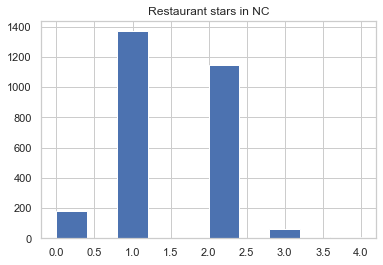

In [23]:
a = plt.hist(business[business['state'] =='NC']['pricerange'])
plt.title('Restaurant stars in NC')
plt.show()